#### Basic Regression with TF

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Simplify numpy printouts
np.set_printoptions(precision=3, suppress=True)


In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#### Get Auto MPG Dataset from UCI

In [14]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [19]:
dataset = raw_dataset.copy()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [20]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [21]:
dataset.dropna(inplace=True)

In [22]:
dataset['Origin'] = dataset['Origin'].map({1:'USA', 2:'Europe', 3:'Japan'})
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [23]:
# One hot encode
dataset=pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [30]:
# Train test split
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

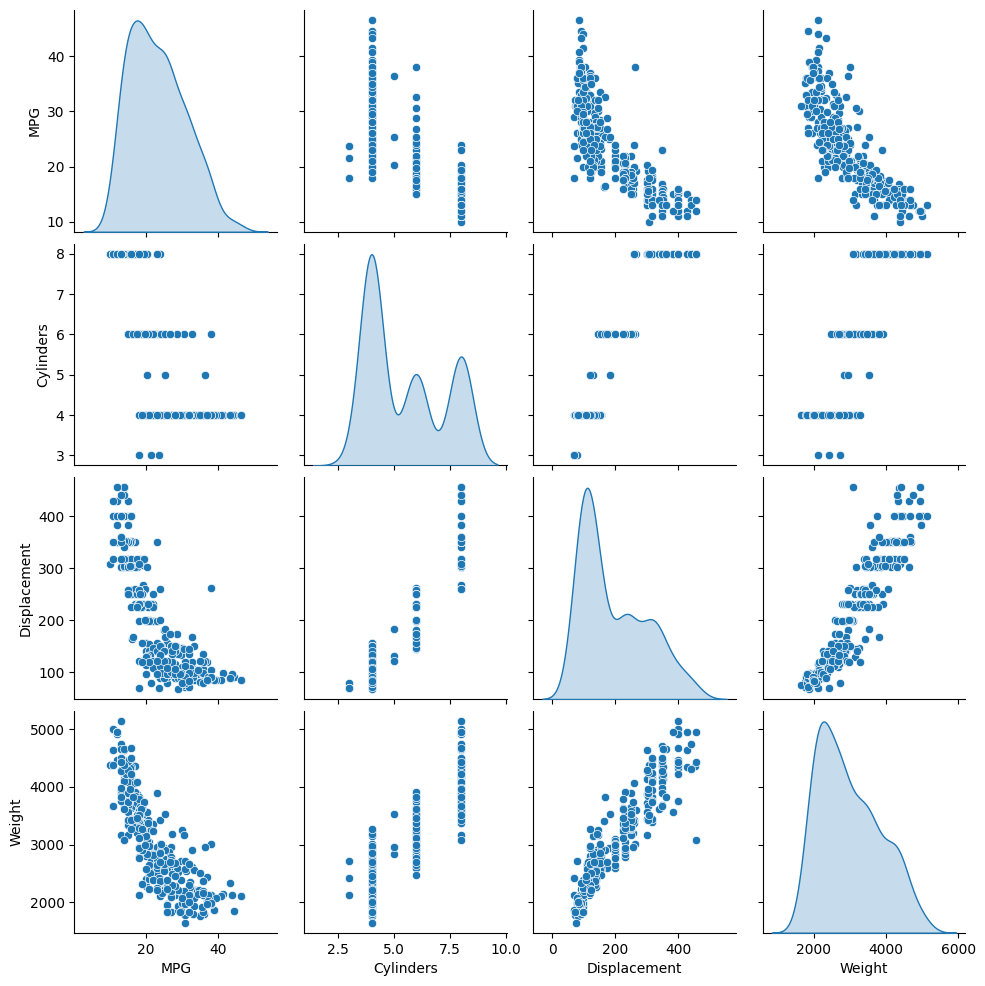

In [27]:
# Inspect the data
cols = ['MPG', 'Cylinders', 'Displacement', 'Weight']
sns.pairplot(train_dataset[cols], diag_kind='kde')

In [29]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [31]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#### Normalization

In [32]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [35]:
# Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1) # Create the layer
normalizer.adapt(np.array(train_features).astype('float32')) # Fit the state of the preprocessing layer to the data

2023-12-17 20:53:42.332304: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [37]:
normalizer.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.178,    0.197,    0.624]], dtype=float32)

In [39]:
first = np.array(train_features[:1]).astype('float32')
with np.printoptions(precision=2, suppress=True):
    print('First Example:', first)
    print('Normalized:', normalizer(first).numpy())

First Example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


#### Linear Regression
- Single Input
- Multiple Input

In [41]:
# With one variable
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [43]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)


_________________________________________________________________


In [44]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 77ms/step


array([[-0.839],
       [-0.474],
       [ 1.548],
       [-1.175],
       [-1.063],
       [-0.417],
       [-1.26 ],
       [-1.063],
       [-0.277],
       [-0.474]], dtype=float32)

In [45]:
horsepower_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [46]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

2023-12-17 21:04:50.103442: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5d24004890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-17 21:04:50.103470: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti Laptop GPU, Compute Capability 8.6
2023-12-17 21:04:50.108500: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-17 21:04:50.127763: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1702875890.193948  380841 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,22.864227,22.938040,0
1,22.061621,22.138063,1
2,21.261692,21.338154,2
3,20.463680,20.537924,3
4,19.661654,19.737818,4
...,...,...,...
95,3.804249,4.189013,95
96,3.805383,4.178980,96
97,3.804951,4.199232,97
98,3.803007,4.187621,98


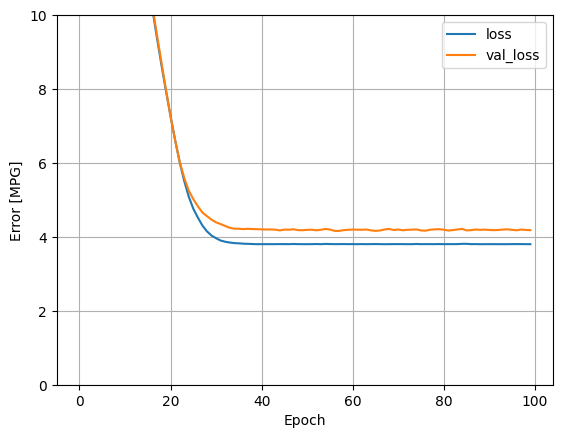

In [49]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [50]:
# look at test
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [51]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


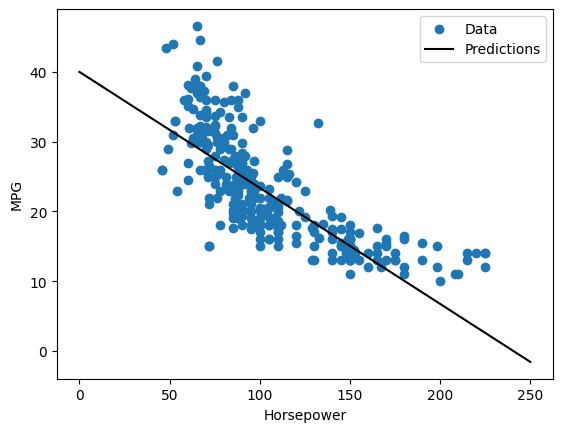

In [52]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

plot_horsepower(x,y)

In [53]:
# Multiple inputs
lm = tf.keras.Sequential([
    normalizer,
    layers.Dense(1)
])

In [55]:
lm.predict(train_features[:10].astype('float32'))

1/1 [==============================] - 0s 176ms/step


array([[ 0.788],
       [ 0.714],
       [-2.219],
       [ 1.8  ],
       [ 0.513],
       [-0.422],
       [ 0.43 ],
       [ 2.583],
       [-0.71 ],
       [-0.767]], dtype=float32)

In [57]:
lm.layers[1].kernel #Kernel weights

<tf.Variable 'dense_2/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.577],
       [-0.526],
       [-0.576],
       [ 0.36 ],
       [-0.539],
       [ 0.433],
       [ 0.356],
       [-0.656],
       [-0.605]], dtype=float32)>

In [59]:
lm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [61]:
history = lm.fit(
    train_features.astype('float32'),
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

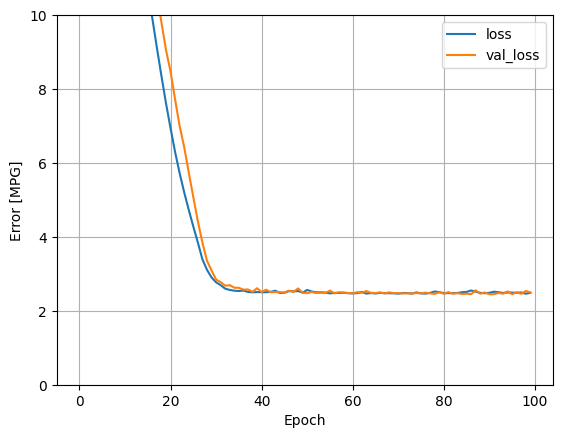

In [62]:
# Much better results than single variable model
plot_loss(history)

In [65]:
test_results['lm'] = lm.evaluate(
    test_features.astype('float32'), test_labels, verbose=0)

#### Regression with Deep Neural Networks

In [93]:
def build_and_compile_model(norm, i):
    model = keras.Sequential([
        layers.Input((None, i)),
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [108]:
# Single input DNN

dnn_hpm = build_and_compile_model(horsepower_normalizer, 1)
dnn_hpm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  multiple                  3         
 tion)                                                           
                                                                 


 dense_18 (Dense)            (None, 64)                128       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [109]:
history = dnn_hpm.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

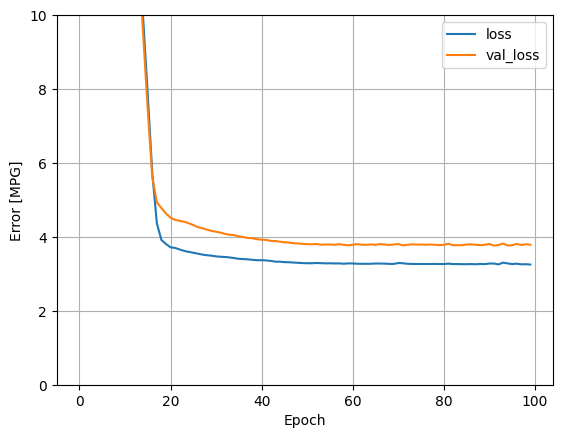

In [110]:
plot_loss(history)

In [111]:
x = tf.linspace(0.0, 250, 251)
y = dnn_hpm.predict(x)

8/8 [==============================] - 0s 3ms/step


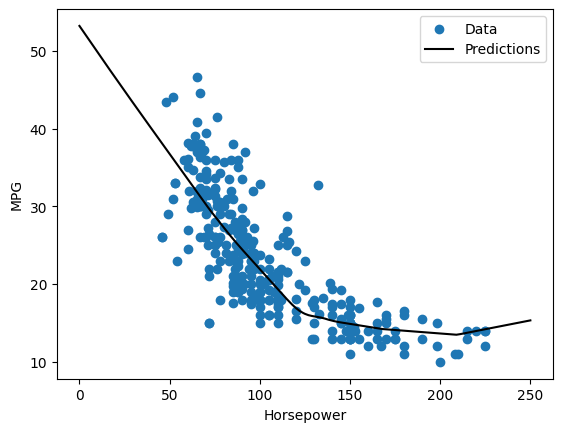

In [112]:
plot_horsepower(tf.linspace(0.0, 250, 251), y)

In [113]:
test_results['dnn_hpm'] = dnn_hpm.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [115]:
# Mutiple inputs
dnn_model = build_and_compile_model(normalizer, 9)
dnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_24 (Dense)            (None, 64)                640       
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [116]:
history = dnn_model.fit(
    train_features.astype('float32'),
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

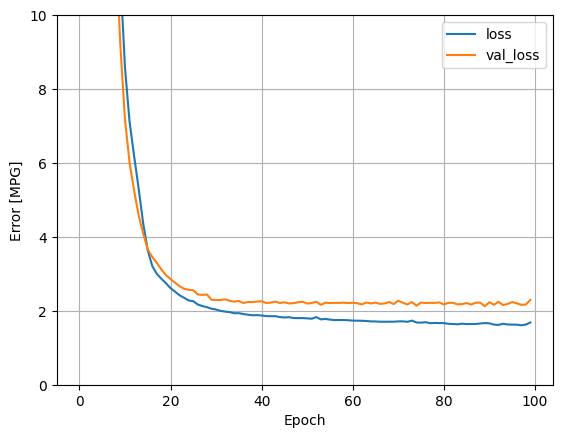

In [117]:
plot_loss(history)

In [118]:
test_results['dnn_model'] = dnn_model.evaluate(test_features.astype('float32'), test_labels, verbose=0)

In [119]:
# Full comparison
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.653173
lm,2.499025
dnn_hpm,2.902966
dnn_model,1.734274


#### Make predictions
- Use best model: DNN

3/3 [==============================] - 0s 3ms/step


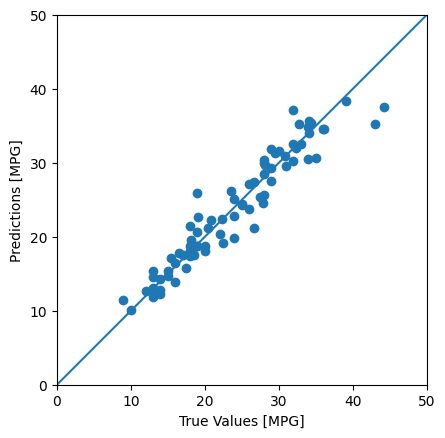

In [120]:
# Predictions
test_predictions = dnn_model.predict(test_features.astype('float32')).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Text(0, 0.5, 'Count')

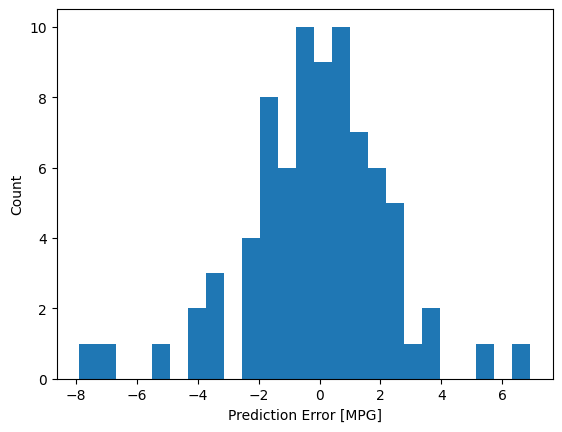

In [121]:
# Check error distributions
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')

In [122]:
SAVEPATH = '../saved_models/'
dnn_model.save(SAVEPATH +'dnn_model.keras')

In [126]:
# Reload and get same results
reloaded = tf.keras.models.load_model(SAVEPATH+'dnn_model.keras')

test_results['reloaded'] = reloaded.evaluate(
    test_features.astype('float32'), test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.653173
lm,2.499025
dnn_hpm,2.902966
dnn_model,1.734274
reloaded,1.734274
